# MLB 

In [ ]:
pip install seaborn

In [6]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [26]:
MLB = pd.read_csv('GL2018.TXT')
print(MLB.columns.tolist())

['Date', 'DoubleHeader', 'DayOfWeek', 'VisitingTeam', 'VisitingTeamLeague', 'VisitingTeamGameNumber', 'HomeTeam', 'HomeTeamLeague', 'HomeTeamGameNumber', 'VisitorRunsScored', 'HomeRunsScore', 'LengthInOuts', 'DayNight', 'CompletionInfo', 'ForfeitInfo', 'ProtestInfo', 'ParkID', 'Attendence', 'Duration', 'VisitorLineScore', 'HomeLineScore', 'VisitorAB', 'VisitorH', 'VisitorD', 'VisitorT', 'VisitorHR', 'VisitorRBI', 'VisitorSH', 'VisitorSF', 'VisitorHBP', 'VisitorBB', 'VisitorIBB', 'VisitorK', 'VisitorSB', 'VisitorCS', 'VisitorGDP', 'VisitorCI', 'VisitorLOB', 'VisitorPitchers', 'VisitorER', 'VisitorTER', 'VisitorWP', 'VisitorBalks', 'VisitorPO', 'VisitorA', 'VisitorE', 'VisitorPassed', 'VisitorDB', 'VisitorTP', 'HomeAB', 'HomeH', 'HomeD', 'HomeT', 'HomeHR', 'HomeRBI', 'HomeSH', 'HomeSF', 'HomeHBP', 'HomeBB', 'HomeIBB', 'HomeK', 'HomeSB', 'HomeCS', 'HomeGDP', 'HomeCI', 'HomeLOB', 'HomePitchers', 'HomeER', 'HomeTER', 'HomeWP', 'HomeBalks', 'HomePO', 'HomeA', 'HomeE', 'HomePassed', 'HomeDB',

In [27]:
MLB['VisitingTeam']

0       COL
1       PHI
2       SFN
3       CHN
4       SLN
       ... 
2426    CHA
2427    TEX
2428    TOR
2429    MIL
2430    COL
Name: VisitingTeam, Length: 2431, dtype: object

In [29]:
MLB18 = MLB[['VisitingTeam','HomeTeam','VisitorRunsScored','HomeRunsScore','Date']]
MLB18 = MLB18.rename(columns = {'VisitorRunsScored':'VisR','HomeRunsScore':'HomR'})
MLB18

,VisitingTeam,HomeTeam,VisR,HomR,Date
0,COL,ARI,2,8,20180329
1,PHI,ATL,5,8,20180329
2,SFN,LAN,1,0,20180329
3,CHN,MIA,8,4,20180329
4,SLN,NYN,4,9,20180329
...,...,...,...,...,...
2426,CHA,MIN,4,5,20180930
2427,TEX,SEA,1,3,20180930
2428,TOR,TBA,4,9,20180930
2429,MIL,CHN,3,1,20181001


In [32]:
MLB18['hwin'] = np.where(MLB18['HomR']>MLB18['VisR'],1,0)
MLB18['awin'] = np.where(MLB18['HomR']<MLB18['VisR'],1,0)
MLB18['count'] = 1.0
MLB18

,VisitingTeam,HomeTeam,VisR,HomR,Date,hwin,awin,count
0,COL,ARI,2,8,20180329,1,0,1.0
1,PHI,ATL,5,8,20180329,1,0,1.0
2,SFN,LAN,1,0,20180329,0,1,1.0
3,CHN,MIA,8,4,20180329,0,1,1.0
4,SLN,NYN,4,9,20180329,1,0,1.0
...,...,...,...,...,...,...,...,...
2426,CHA,MIN,4,5,20180930,1,0,1.0
2427,TEX,SEA,1,3,20180930,1,0,1.0
2428,TOR,TBA,4,9,20180930,1,0,1.0
2429,MIL,CHN,3,1,20181001,0,1,1.0


In [49]:
MLBhome = MLB18.groupby('HomeTeam')['hwin','HomR','VisR','count'].sum().reset_index()
MLBhome = MLBhome.rename(columns={'HomeTeam':'team','VisR':'VisRh','HomR':'HomRh','count':'Gh'})
MLBhome

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,team,hwin,HomRh,VisRh,Gh
0,ANA,42,355,355,81.0
1,ARI,40,359,328,81.0
2,ATL,43,391,357,81.0
3,BAL,28,339,411,81.0
4,BOS,57,468,322,81.0
5,CHA,30,321,409,81.0
6,CHN,51,385,349,82.0
7,CIN,37,385,418,81.0
8,CLE,49,443,334,81.0
9,COL,47,445,404,81.0


In [47]:
MLBaway = MLB18.groupby('VisitingTeam')['awin','HomR','VisR','count'].sum().reset_index()
MLBaway = MLBaway.rename(columns={'VisitingTeam':'team','VisR':'VisRa','HomR':'HomRa','count':'Ga'})
MLBaway

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,team,awin,HomRa,VisRa,Ga
0,ANA,38,367,366,81.0
1,ARI,42,316,334,81.0
2,ATL,47,300,368,81.0
3,BAL,19,481,283,81.0
4,BOS,51,325,408,81.0
5,CHA,32,439,335,81.0
6,CHN,44,296,376,81.0
7,CIN,30,401,311,81.0
8,CLE,42,314,375,81.0
9,COL,44,341,335,82.0


In [50]:
MLB18 = pd.merge(MLBhome,MLBaway,on='team')
MLB18

,team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga
0,ANA,42,355,355,81.0,38,367,366,81.0
1,ARI,40,359,328,81.0,42,316,334,81.0
2,ATL,43,391,357,81.0,47,300,368,81.0
3,BAL,28,339,411,81.0,19,481,283,81.0
4,BOS,57,468,322,81.0,51,325,408,81.0
5,CHA,30,321,409,81.0,32,439,335,81.0
6,CHN,51,385,349,82.0,44,296,376,81.0
7,CIN,37,385,418,81.0,30,401,311,81.0
8,CLE,49,443,334,81.0,42,314,375,81.0
9,COL,47,445,404,81.0,44,341,335,82.0


In [54]:
MLB18['W'] = MLB18['hwin'] + MLB18['awin']
MLB18['G'] = MLB18['Ga'] + MLB18['Gh']
MLB18['R'] = MLB18['HomRh'] + MLB18['VisRa']
MLB18['RA'] = MLB18['HomRa'] + MLB18['VisRh']
MLB18

,team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga,W,G,R,RA
0,ANA,42,355,355,81.0,38,367,366,81.0,80,162.0,721,722
1,ARI,40,359,328,81.0,42,316,334,81.0,82,162.0,693,644
2,ATL,43,391,357,81.0,47,300,368,81.0,90,162.0,759,657
3,BAL,28,339,411,81.0,19,481,283,81.0,47,162.0,622,892
4,BOS,57,468,322,81.0,51,325,408,81.0,108,162.0,876,647
5,CHA,30,321,409,81.0,32,439,335,81.0,62,162.0,656,848
6,CHN,51,385,349,82.0,44,296,376,81.0,95,163.0,761,645
7,CIN,37,385,418,81.0,30,401,311,81.0,67,162.0,696,819
8,CLE,49,443,334,81.0,42,314,375,81.0,91,162.0,818,648
9,COL,47,445,404,81.0,44,341,335,82.0,91,163.0,780,745


In [55]:
MLB18['wpc'] = MLB18['W']/MLB18['G']
MLB18['pyth'] = MLB18['R']**2/(MLB18['R']**2 + MLB18['RA']**2)
MLB18

,team,hwin,HomRh,VisRh,Gh,awin,HomRa,VisRa,Ga,W,G,R,RA,wpc,pyth
0,ANA,42,355,355,81.0,38,367,366,81.0,80,162.0,721,722,0.493827,0.499307
1,ARI,40,359,328,81.0,42,316,334,81.0,82,162.0,693,644,0.506173,0.536600
2,ATL,43,391,357,81.0,47,300,368,81.0,90,162.0,759,657,0.555556,0.571662
3,BAL,28,339,411,81.0,19,481,283,81.0,47,162.0,622,892,0.290123,0.327161
4,BOS,57,468,322,81.0,51,325,408,81.0,108,162.0,876,647,0.666667,0.647037
5,CHA,30,321,409,81.0,32,439,335,81.0,62,162.0,656,848,0.382716,0.374388
6,CHN,51,385,349,82.0,44,296,376,81.0,95,163.0,761,645,0.582822,0.581946
7,CIN,37,385,418,81.0,30,401,311,81.0,67,162.0,696,819,0.413580,0.419344
8,CLE,49,443,334,81.0,42,314,375,81.0,91,162.0,818,648,0.561728,0.614423
9,COL,47,445,404,81.0,44,341,335,82.0,91,163.0,780,745,0.558282,0.522939


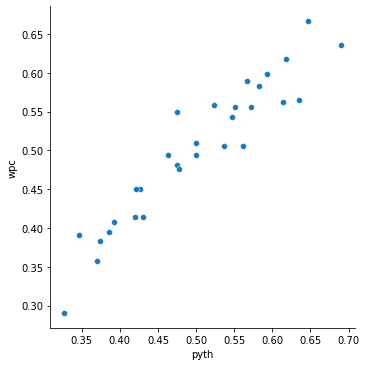

In [58]:
sns.relplot(x="pyth",y="wpc",data=MLB18)

In [62]:
pyth_lm = smf.ols(formula = 'wpc ~ pyth',data=MLB18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    wpc   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     236.2
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           3.54e-15
Time:                        15:21:15   Log-Likelihood:                 63.733
No. Observations:                  30   AIC:                            -123.5
Df Residuals:                      28   BIC:                            -120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0609      0.029      2.093      0.046       0.001       0.120
pyth           0.8770      0.057     15.370      0.000       0.760       0.994
==============================================================================
Omnibus:                        0.145   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.930   Jarque-Bera (JB):                0.012
Skew:                          -0.009   Prob(JB):                        0.994
Kurtosis:                       2.905   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""